# Байесовский выбор моделей
## Домашняя работа №2
### Никитина Мария, Б05-003

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
import scipy.integrate as integrate
from statsmodels.stats.multitest import multipletests

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# Задача 1

Пусть есть НОР (i.i.d.) выборка $x_1, ..., x_n, n > 100$ из нормального распределения со средним $m$ и неизвестной дисперсией $\sigma$. На уровне значимости $\alpha$ проверить гипотезу $H_0$ о том, что $m = 0$. Выписать критическую область и сосчитать мощность критерия $W$ в зависимости от истинных $m$ и $\sigma$.


Возьмем статистику: $T(x) = \frac{1}{n} \sum\limits_{i=1}^n x_i$.

Гипотеза $H_0$: $m = 0$. Тогда $T(x) \sim N(0, \frac{\sigma^2}{n})$.

Дисперсия неизвестна, поэтому её находим из формулы: $\hat{\sigma}^2 = \frac{1}{n} \sum\limits_{i=1}^n (x_i - \overline{x})^2$.

$x_i$ из нормального распределения, поэтому распределение симметрично. Значит, в качестве критической области берём "хвосты":

$$\alpha = \int\limits_{-\infty}^{- t_{\alpha}} \frac{\sqrt{n}}{\sqrt{2\pi}\hat{\sigma}} \exp{\left(-\frac{nt^2}{2\hat{\sigma}^2}\right)}dt + \int\limits_{t_\alpha}^{+\infty}\frac{\sqrt{n}}{\sqrt{2\pi}\hat{\sigma}} \exp{\left(-\frac{nt^2}{2\hat{\sigma}^2}\right)}dt = 2 \int\limits_{t_\alpha}^{+\infty} \frac{\sqrt{n}}{\sqrt{2\pi}\hat{\sigma}} \exp{\left(-\frac{nt^2}{2\hat{\sigma}^2}\right)}dt$$

$t_\alpha$ отделяет "хвост" площадью $\frac{\alpha}{2}$. Гипотеза отвергается, если $T(x) \notin [-t_{\alpha}, t_{\alpha}]$.

Мощность критерия -- это площадь "хвостов". Значит,

$$W(m, \sigma^2) = \int\limits_{-\infty}^{-t_\alpha} \frac{\sqrt{n}}{\sqrt{2\pi}\sigma} \exp{\left(-\frac{n(t-m)^2}{2\sigma^2}\right)} dt + \int\limits_{t_\alpha}^{+\infty} \frac{\sqrt{n}}{\sqrt{2\pi}\sigma} \exp{\left(-\frac{n(t-m)^2}{2\sigma^2}\right)} dt$$

# Задача 2

Пусть имеется обучающая и тестовая выборки $(X_1, y_1), X_1 \in \mathbb{R}^{m_1 \times n}, y_1 \in [−1, 1]^{m_1}, (X_2, y_2), X_2 \in \mathbb{R}^{m_2 \times n}, y_2 \in [−1, 1]^{m_2}$, полученные из общей модели
генерации данных с совместным правдоподобием

$$p(y, w, X|\alpha) = \prod\limits_i N(x_i|0, \sigma^2I_n) N(w|0, \alpha^{-1}I_n)\prod\limits_i p(y_j|x_j, w),$$

где $P(y_j|x_j, w)$ дается моделью логистической регрессии, то есть

$$P(y_j = 1) = \frac{1}{1 + \exp(−w^{\top}x_j)}.$$

а) Пусть Вам известен настоящий вектор $w$, полученный из априорного распределения $p(w|\alpha) = N(w|0, \alpha^{-1}I_n)$. Вычислите ожидаемое максимальное качество в терминах AUC на тестовой выборке при $m_2 \to \infty$ сэмплированием (4 балла), аналитически (6 баллов).

б) Пусть Вами случайно выбран некоторый вектор $w_0$, независимо от настоящего $w$. Вычислить в этом случае для разных $m_2$ ожидаемое качество в терминах AUC E(AUC) для разных $m_2$ сэмплированием (4 балла), аналитически (6 баллов).

Пусть максимальное качество достигается на модели $f$.

Тогда $AUC$:

$$AUC(f)=\frac{\sum\limits_{t_0 \in \mathbf{M}^0} \sum\limits_{t_1 \in \mathbf{M}^1} I\left[f\left(t_0\right)<f\left(t_1\right)\right]}{|\mathbf{M}^0| \cdot |\mathbf{M}^1|},$$

где $\mathbf{M}^i$ -- множество $i$-го класса.

При $n \to \infty$ $|\mathbf{M}^i| \approx \sum\limits_j^mP(y_j = i)$

$$AUC(f) = \frac{\sum\limits_i^m \sum\limits_j^m \mathbf{P}(y_i = 0) \mathbf{P}(y_j=1) \cdot I[f(y_i = 1) < f(y_j = 1)]}{\sum\limits_i^m \sum\limits_j^m \mathbf{P}(y_i = 0) \mathbf{P}(y_j=1)} = \frac{\sum\limits_i^m \sum\limits_j^m (1 - p_i) p_j \cdot I[f(y_i = 1) < f(y_j = 1)]}{\sum\limits_i^m \sum\limits_j^m (1-p_i)p_j}$$

Так как стоит индикатор $I[f(y_i = 1) < f(y_j = 1)]$, то каждая пара $i,j$ встречается в числителе один раз.

Значит, имеем два случая:
  - если $(1 - p_i)p_j > (1 - p_j)p_i$, то больший вклад в числителе будет, если $f(y_i = 1) < f(y_j = 1)$.

  - если $(1 - p_i)p_j < (1 - p_j)p_i$, то больший вклад в числителе будет, если $f(y_i = 1) > f(y_j = 1)$.

Тогда получаем, что для максимального $AUC(f)$, если $ p_i < p_j$, то $f(y_i = 1) < f(y_j = 1)$.

Следовательно, больше, чем при $f(y_i = 1) = p_i$, значение $AUC(f)$ не получить.

$$\max(AUC) = \frac{\sum\limits_i^m \sum\limits_j^m (1 - p_i) p_j \cdot I[p_i < p_j]}{\sum\limits_i^m \sum\limits_j^m (1-p_i)p_j}$$

In [ ]:
def get_proba(w, x):
    return 1 / ( 1 + np.exp(-w.dot(x)))

def get_class(w, x):
    return np.random.binomial(1, get_proba(w, x))

In [ ]:
def get_sampl(n, m_2):
    sigma = 1
    alpha = 1

    w = np.random.multivariate_normal(mean=np.zeros(n), cov=np.eye(n) / alpha)
    X_test = np.random.multivariate_normal(mean=np.zeros(n), cov=np.eye(n) * sigma**2, size=m_2)
    y_test = np.apply_along_axis(lambda x: get_class(w, x), 1, X_test)

    return w, X_test, y_test

def theory_AUC(w, X):
    numerator = 0
    denominator = 0

    proba = [get_proba(w, x) for x in X]
    m = len(X)

    for i in range(m):
        for j in range(m):
            value = (1 - proba[i]) * proba[j]

            if proba[i] < proba[j]:
                numerator += value

            denominator += value

    return numerator / denominator

def sampl_AUC(X, y, w):
    AUC_list = []
    X_neg = X[np.where(y == 0)]
    X_pos = X[np.where(y == 1)]

    AUC = 0

    for x_n in X_neg:
        for x_p in X_pos:
            if get_proba(w, x_n) < get_proba(w, x_p):
                AUC += 1

    AUC /= len(X_neg) * len(X_pos)

    return AUC

In [ ]:
n = 10
m_2 = 1000

w, X_test, y_test = get_sampl(n, m_2)
AUC = theory_AUC(w, X_test)
print(f"Theory AUC: {AUC}")

Theory AUC: 0.9558927961637778


In [ ]:
AUC = []
for i in range(10):
    AUC.append(sampl_AUC(X_test, y_test, w))
print(f"Sampl AUC: {np.mean(AUC)}")

Sampl AUC: 0.9640360680823109


Посмотрим на результат работы логистической регрессии.

In [ ]:
m_1 = 1000
sigma = 1
X_train = np.random.multivariate_normal(mean=np.zeros(n), cov = np.eye(n) * sigma**2, size=m_1)
y_train = np.apply_along_axis(lambda x: get_class(w, x), 1, X_train)

model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)
print(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

0.9609035447185736


б) Найдём сэмплированием. Для каждого $m_2$ возьмём среднее из 10 сэмплов.

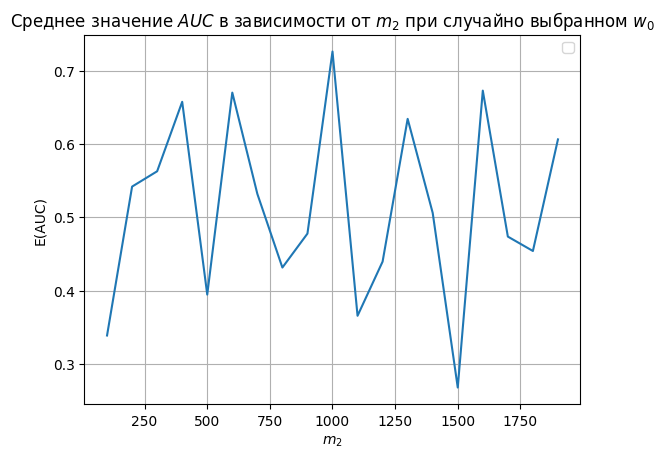

In [ ]:
n = 10
m_2_list = []
AUC_list = []

for m_2 in range(100, 2000, 100):
    m_2_list.append(m_2)
    w, X_test, y_test = get_sampl(n, m_2)
    w_0 = np.random.multivariate_normal(mean=np.ones(n), cov=np.eye(n))
    AUC = []

    for i in range(10):
        AUC.append(sampl_AUC(X_test, y_test, w_0))

    AUC_list.append(np.mean(AUC))

plt.plot(m_2_list, AUC_list)
plt.xlabel(r"$m_2$")
plt.ylabel(r"E(AUC)")
plt.title(r"Среднее значение $AUC$ в зависимости от $m_2$ при случайно выбранном $w_0$")
plt.grid()
plt.legend()

# Задача 3

В обозначениях задачи 2

а) Доказать, что Accuracy (ACC) (доля правильно предсказанных классов объектов) частный случай ASY(P) (см. определение из практического задания 1) (2 балла);

б) Пусть класс объектов $y_j$ не зависит от $x_j$, то есть выборка шумовая.

  - Построить наилучший прогноз $\hat{y}_2$ на тестовой выборке в терминах ACC, если $P(y_j = 1) = p$. (2 балла).

  - Построить наилучший прогноз $\hat{y}_2$ на тестовой выборке в терминах ASY(P) в общем случае, если $P(y_j = 1) = p$? (4 балла)

  - Как оценить $p$ по обучающей выборке и что делать, если оценка не отличается значимо от 0.5? (2 балла)

а) Accuracy:

$$ACC = \frac{\sum\limits_{i=1}^{m_2} |y_i = \hat{y}_i|}{m_2} = \frac{m_{00} + m_{11}}{m_2},$$

где $\hat{y}_i$ -- предсказанное значение $i$-ого элемента, $m_{ii}$ -- число правильно предсказанных объектов класса $i$.

ASY(P):

$$ASY(P) = \sum\limits_{i=1}^{m_2} p_{y_i\hat{y}_i}$$

Если ${P} =
\begin{pmatrix}
  -\frac{1}{m_2} & 0\\
  0 & -\frac{1}{m_2}
\end{pmatrix}$, то:

$$ACC = \sum_{i = 1}^{m_{00}} \dfrac{1}{m_2} + \sum_{i = 1}^{m_{11}} \dfrac{1}{m_2} + \sum_{i = 1}^{m_{01}} 0 + \sum_{i = 1}^{m_{10}} 0 = ASY(P).$$

$ASY(P)$ надо минимизировать, а $ACC$ -- максимизировать, поэтому добавили минус.

б)

  - Пусть предсказанный класс $i$-ого объекта равен $\hat{y}_i$ и $\hat{p}_i = P(\hat{y}_i = 1)$, тогда:
  
  $$\text{ACC} = \frac{\sum_{i=1}^{m_2}|y_i = \hat{y}_i|}{m_2}$$

  Матожидание $ACC$:

  $$E(\text{ACC}) = \frac{\sum\limits_{i=1}^{m_2} P(y_i = \hat{y}_i)}{m_2} = \frac{1}{m_2} \sum_{i=1}^{m_2}(pP(\hat{y}_i = 1) + (1 - p)(1 - P(\hat{y}_i = 1))) = \frac{1}{m_2}\sum_{i=1}^{m_2} (p\hat{p}_i + (1 - p)(1 - \hat{p}_i)) = \frac{1}{m_2} \sum_{i=1}^{m_2}(\hat{p}_i (2p - 1) + 1 - p)$$
  
  Значит, максимум $ACC$ будет достигаться при
  
  $$
  \hat{p}_i = \begin{cases}
  1, \quad p \geq 0.5 \\
  0, \quad p < 0.5
  \end{cases}
  $$

  То есть, в качестве классификатора берём тот, что предсказывает всегда один и тот же класс (тот, который имеет наибольшую вероятность).

  -
  $$E(ASY(P)) = \sum\limits_{i=1}^{m_2} p_{00}(1-p)(1-\hat{p}_i) + p_{01}(1-p)\hat{p}_i + p_{10}p(1-\hat{p}_i) + p_{11} p\hat{p}_i = \sum\limits_{i=1}^{m_2} \hat{p}_i \left( p_{00} (p-1) + p_{01} (1-p) - p p_{10} + pp_{11}\right) + C,$$
  где $C$ - константа, не зависящая от $\hat{p}_i$.

  Значит, максимум $ASY(P)$ будет достигаться при:
$$
\hat{p}_i = \begin{cases}
1, \quad p_{00} (p-1) + p_{01} (1-p) - p p_{10} + pp_{11} \geq 0 \\
0, \quad p_{00} (p-1) + p_{01} (1-p) - p p_{10} + pp_{11} < 0
\end{cases}
$$

  - Считаем $p = \frac{1}{m_1} \sum\limits_{i=1}^{m_1} y_i$. По ЗБЧ имеем, что при $m_1 \to \infty$ наш параметр $p$ будет приближаться к истинному. Если $p$ получилось близким к $0.5$, возьмём $p = 0.5$.

# Задача 4

Пусть имеется выборка $x^0_1, ..., x^0_{m_1}$ объектов класса $0$ размера $m_1$ и выборка $x^1_1, ..., x^1_{m_2}$ объектов класса $1$ размера $m_2$. Пусть известно, что признаки независимы в совокупности в обеих выборках, а также, что признаки имеют нормальное распределение с дисперсиями $\sigma^2_j$, одинаковой для одного и того же признака в разных классах, и, возможно, разной между признаками. Пусть требуется проверить гипотезу о том, что мат. ожидание значения признака с номером $j$ совпадает для обоих классов.

а) Пусть $\sigma^2_j = \sigma^2 $ известно. Проверить гипотезу о равенстве мат. ожиданий не уровне значимости $\alpha = 0.05$ (3 балла).

б) Та же задача, что и в пункте а, но $\sigma^2_j = \sigma^2 $ неизвестно (5 баллов).

в) Пусть n = 100, $\sigma^2_j = j$. Для каждой пары $m_1, m_2$ сгенерировать выборку с такими параметрами, сделав мат. ожидания всех признаков кроме $j^∗$ одинаковыми, а для признака $j^∗$ сделать разницу мат. ожиданий равной 1. Считая $\sigma^2_j$ неизвестными, реализовать метод, предложенный в п. б) и использовать его для проверки гипотез о равенстве мат. ожиданий для каждого из n = 100 признаков (4 балла). Применить поправку на множественное тестирование Бенджамини-Хохберга (2 балла) и изучить зависимость количества ложных положительных и настоящих положительных отклоний гипотезы о равенстве мат. ожидания от $m_1, m_2$ (6 баллов).

г) Предложите метод решения этой задачи, если признаки не имеют нормального распределения (5 баллов).

а) Гипотеза $H_0$: $M_0 = M_1$, где $M_0, M_1$ -- матожидание выборок.

Возьмём статистику:

$$T(Z) = \left(\frac{1}{m_1}\sum\limits_{i=1}^{m_1} x^0_i - \frac{1}{m_2}\sum\limits_{i=1}^{m_2} x^1_i\right)$$

При условии, что $H_0$ верна:

$$T(Z) \sim N(0, \frac{\sigma^2}{m_1} + \frac{\sigma^2}{m_2})$$

Гипотеза отвергается, если $T(Z) \notin \left(-2 \sqrt{\frac{\sigma^2}{m_1} + \frac{\sigma^2}{m_2}}, 2\sqrt{\frac{\sigma^2}{m_1} + \frac{\sigma^2}{m_2}}\right)$.

б) Оценим матожидания: $M_0 = \frac{1}{m_1}\sum\limits_{i = 1}^{m_1} x^0_i$ и $M_1 = \frac{1}{m_2}\sum\limits_{i = 1}^{m_2} x^1_i$.

Оценим дисперсию:

$$\hat{\sigma^2} = \frac{1}{m_1+m_2-1}\left(\sum\limits_{i = 1}^{m_1} (x^0_i - M_0)^2 + \sum\limits_{i = 1}^{m_2} (x^1_i - M_1)^2\right)$$

Далее, аналогично пункту а), получим, что
$$
T(Z) \sim N(0, \frac{\hat{\sigma^2}}{m_1} + \frac{\hat{\sigma^2}}{m_2}),
$$

Гипотеза отвергается, если $T(Z) \notin \left(-2 \sqrt{\frac{\hat{\sigma^2}}{m_1} + \frac{\hat{\sigma^2}}{m_2}}, 2\sqrt{\frac{\hat{\sigma^2}}{m_1} + \frac{\hat{\sigma^2}}{m_2}}\right)$.

In [ ]:
n = 100
m_list = [(100, 100), (1000, 1000), (5000, 5000), (100, 1000), (1000, 5000), (100, 5000)]

j_ind = 10

def get_samples(m_1, m_2, n, j_ind):
    X_0 = []
    X_1 = []

    for i in range(n):
        if i == j_ind:
            X_0.append(np.random.normal(1, j_ind ** 0.5, m_1))
            X_1.append(np.random.normal(0, j_ind ** 0.5, m_2))
        else:
            X_0.append(np.random.normal(1, i ** 0.5, m_1))
            X_1.append(np.random.normal(1, i** 0.5, m_2))

    return np.array(X_0).T, np.array(X_1).T

def T(set_1, set_2):
    return np.mean(set_1) - np.mean(set_2)

def get_std(X_0, X_1):
    X_0_sum = np.sum((X_0 - np.mean(X_0))**2)
    X_1_sum = np.sum((X_1 - np.mean(X_1))**2)
    m_1 = len(X_0)
    m_2 = len(X_1)
    std = (X_0_sum + X_1_sum) / (m_1 + m_2 - 1)
    return np.sqrt(std / m_1 + std / m_2)

def check(m_1, m_2, n, j_ind):
    X_0, X_1 = get_samples(m_1, m_2, n, j_ind)
    true_accepted = 0
    false_accepted = 0
    true_rejected = 0
    false_rejected = 0
    p_values = []

    for i in range(n):
        val = T(X_0[:, i], X_1[:, i])
        std = get_std(X_0[:, i], X_1[:, i])

        if abs(val) >= 2 * std:
            if i == j_ind:
                true_rejected += 1
            else:
                false_rejected += 1
        else:
            if i == j_ind:
                false_accepted += 1
            else:
                true_accepted += 1

        p_value = integrate.quad(lambda x : norm.pdf(x, 0, std), abs(val), np.inf)[0] +\
                  integrate.quad(lambda x : norm.pdf(x, 0, std), -np.inf, -abs(val))[0]

        p_values.append(p_value)

    return true_accepted, false_accepted, true_rejected, false_rejected, p_values

def bh_check(p_values, j_ind):
    true_accepted = 0
    false_accepted = 0
    true_rejected = 0
    false_rejected = 0
    bh = multipletests(p_values, 0.05, method="fdr_bh")[0]
    for i in range(len(bh)):
        if not bh[i]:
            if i == j_ind:
                false_accepted += 1
            else:
                true_accepted += 1
        else:
            if i == j_ind:
                true_rejected += 1
            else:
                false_rejected += 1
    return true_accepted, false_accepted, true_rejected, false_rejected

In [ ]:
for m_1, m_2 in m_list:
    true_accepted, false_accepted, true_rejected, false_rejected, p_values = check(m_1, m_2, n, j_ind)
    print(f"m_1: {m_1}, m_2: {m_2}")
    print(f"Число верно принятых гипотез = {true_accepted}")
    print(f"Число ложно принятых гипотез = {false_accepted}")
    print(f"Число верно отклоненых гипотез = {true_rejected}")
    print(f"Число ложно отклоненых гипотез = {false_rejected}")
    print()
    true_accepted, false_accepted, true_rejected, false_rejected = bh_check(p_values, j_ind)
    print(f"Число верно принятых гипотез с поправкой Б-Х = {true_accepted}")
    print(f"Число ложно принятых гипотез с поправкой Б-Х = {false_accepted}")
    print(f"Число верно отклоненых гипотез с поправкой Б-Х = {true_rejected}")
    print(f"Число ложно отклоненых гипотез с поправкой Б-Х = {false_rejected}")
    print(30 * "==")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
<ipython-input-28-50ec31358b56>:54: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  p_value = integrate.quad(lambda x : norm.pdf(x, 0, std), abs(val), np.inf)[0] +\
<ipython-input-28-50ec31358b56>:55: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrate.quad(lambda x : norm.pdf(x, 0, std), -np.inf, -abs(val))[0]


m_1: 100, m_2: 100
Число верно принятых гипотез = 97
Число ложно принятых гипотез = 0
Число верно отклоненых гипотез = 1
Число ложно отклоненых гипотез = 2

Число верно принятых гипотез с поправкой Б-Х = 99
Число ложно принятых гипотез с поправкой Б-Х = 1
Число верно отклоненых гипотез с поправкой Б-Х = 0
Число ложно отклоненых гипотез с поправкой Б-Х = 0
m_1: 1000, m_2: 1000
Число верно принятых гипотез = 93
Число ложно принятых гипотез = 0
Число верно отклоненых гипотез = 1
Число ложно отклоненых гипотез = 6

Число верно принятых гипотез с поправкой Б-Х = 99
Число ложно принятых гипотез с поправкой Б-Х = 0
Число верно отклоненых гипотез с поправкой Б-Х = 1
Число ложно отклоненых гипотез с поправкой Б-Х = 0
m_1: 5000, m_2: 5000
Число верно принятых гипотез = 95
Число ложно принятых гипотез = 0
Число верно отклоненых гипотез = 1
Число ложно отклоненых гипотез = 4

Число верно принятых гипотез с поправкой Б-Х = 98
Число ложно принятых гипотез с поправкой Б-Х = 0
Число верно отклоненых г

Нас интересует, находится ли правильно отличие матожиданий для $j^*$. Посмотрим на разные $m_1$ и $m_2$.

In [ ]:
m_list = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
df_true_rejected = pd.DataFrame(0, index=m_list, columns=m_list)
df_false_rejected = pd.DataFrame(0, index=m_list, columns=m_list)

for m_1 in m_list:
    for m_2 in m_list:
        t_a, f_a, t_r, f_r, p_values = check(m_1, m_2, n, j_ind)
        true_accepted, false_accepted, true_rejected, false_rejected = bh_check(p_values, j_ind)
        df_true_rejected.at[m_1, m_2] = true_rejected
        df_false_rejected.at[m_1, m_2] = false_rejected

print("Число верно отклоненых гипотез с поправкой Б-Х в зависимости от m_1 и m_2")
display(df_true_rejected)
print()
print("Число ложно отклоненых гипотез с поправкой Б-Х в зависимости от m_1 и m_2")
display(df_false_rejected)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
<ipython-input-28-50ec31358b56>:54: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  p_value = integrate.quad(lambda x : norm.pdf(x, 0, std), abs(val), np.inf)[0] +\
<ipython-input-28-50ec31358b56>:55: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrate.quad(lambda x : norm.pdf(x, 0, std), -np.inf, -abs(val))[0]


Число верно отклоненых гипотез с поправкой Б-Х в зависимости от m_1 и m_2


,10,50,100,500,1000,5000,10000,50000,100000
10,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0
100,0,0,0,0,1,1,0,0,1
500,0,0,0,1,1,1,1,1,1
1000,0,0,0,1,1,1,1,1,1
5000,0,0,0,1,1,1,1,1,1
10000,0,0,0,1,1,1,1,1,1
50000,0,0,1,1,1,1,1,1,1
100000,0,0,0,1,1,1,1,1,1



Число ложно отклоненых гипотез с поправкой Б-Х в зависимости от m_1 и m_2


,10,50,100,500,1000,5000,10000,50000,100000
10,1,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0
100,0,1,0,0,0,0,0,0,0
500,0,1,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0
5000,0,0,0,0,0,0,0,0,0
10000,0,0,0,1,0,0,0,0,1
50000,0,0,0,0,1,0,0,0,0
100000,1,0,0,0,0,1,0,0,0


Видим, что, если $m_1$ или $m_2$ не превосходят $n$, не отклоняется гипотеза на элементе $j^*$. Из второй таблицы делаем вывод, что поправка контролирует ошибку на уровне $\alpha$.